# Assignment no 16 ( Neural Networks )

## <font color="red">Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [2]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 177.0/177.0 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 781.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

In [4]:
gasturbines = pd.read_csv("gas_turbines.csv")

gasturbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [7]:
gasturbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
gasturbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

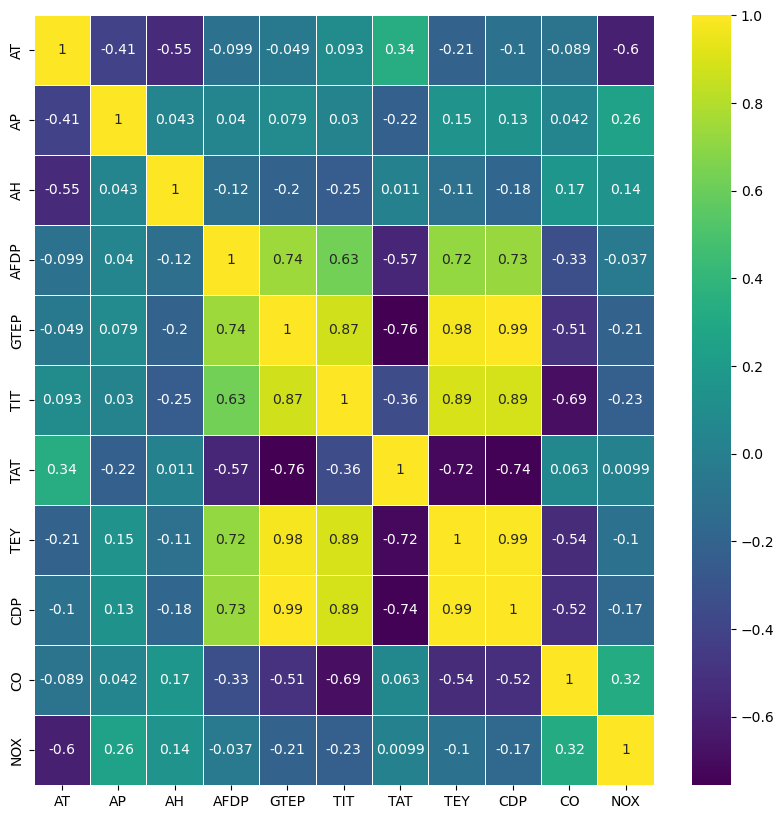

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(gasturbines.corr(),annot=True,cmap="viridis",linewidths=0.5)

In [10]:
# Finding Categorical Data :
print("The AT column")
print(gasturbines['AT'].value_counts())
print()
print("The AP column")
print(gasturbines['AP'].value_counts())
print()
print("The AH column")
print(gasturbines['AH'].value_counts())
print()
print("The AFDP column")
print(gasturbines['AFDP'].value_counts())
print()
print("The GTEP column")
print(gasturbines['GTEP'].value_counts())
print()
print("The TIT column")
print(gasturbines['TIT'].value_counts())
print()
print("The TAT column")
print(gasturbines['TAT'].value_counts())
print()
print("The TEY column")
print(gasturbines['TEY'].value_counts())
print()
print("The CDP column")
print(gasturbines['CDP'].value_counts())
print()
print("The CO column")
print(gasturbines['CO'].value_counts())
print()
print("The NOX column")
print(gasturbines['NOX'].value_counts())
print()

The AT column
20.1350    5
25.9690    5
14.0430    5
20.1690    5
20.7200    5
          ..
17.7090    1
17.2890    1
17.1100    1
17.2850    1
6.9279     1
Name: AT, Length: 12086, dtype: int64

The AP column
1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
996.30       1
998.02       1
998.48       1
998.88       1
1029.80      1
Name: AP, Length: 540, dtype: int64

The AH column
100.140    31
100.150    29
100.110    28
100.120    24
100.130    19
           ..
57.187      1
60.104      1
62.370      1
67.608      1
97.533      1
Name: AH, Length: 12637, dtype: int64

The AFDP column
4.5032    7
4.4361    6
3.8837    6
4.4273    6
4.2500    6
         ..
4.5599    1
4.6085    1
4.5880    1
4.5110    1
3.4770    1
Name: AFDP, Length: 11314, dtype: int64

The GTEP column
25.487    9
25.552    9
24.308    9
24.288    9
24.361    9
         ..
25.686    1
22.525    1
25.485    1
20.980    1
19.164    1
Name: GTEP, Length: 8234, dtype: int64

The 

In [11]:
gasturbines.shape

(15039, 11)

In [12]:
# Defining Predictors and Target Variables :
predictors_1 = gasturbines.iloc[:,0:7]
predictors_2 = gasturbines.iloc[:,8:]
predictors = predictors_1.join(predictors_2)

target = gasturbines.iloc[:,7]

In [13]:
predictors

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [14]:
target

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [15]:
# Splitting data into Train and Test Data Set :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.3,random_state=0)

In [16]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [17]:
#input layer + 1st hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#adding 2nd layer
ann.add(tf.keras.layers.Dense(units =6,activation='relu'))
#adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

In [18]:
#Training the ANN
#compililng the ANN
ann.compile(optimizer='adam',loss = 'mean_squared_error')

In [19]:
history = ann.fit(x_train,y_train,batch_size=32, epochs= 100)

Epoch 1/100
329/329 [==============================] - 3s 4ms/step - loss: 1210.9263
Epoch 2/100
329/329 [==============================] - 1s 4ms/step - loss: 194.3036
Epoch 3/100
329/329 [==============================] - 1s 3ms/step - loss: 166.7844
Epoch 4/100
329/329 [==============================] - 1s 3ms/step - loss: 136.0651
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 105.2002
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 78.0380
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 55.8952
Epoch 8/100
329/329 [==============================] - 1s 2ms/step - loss: 39.8744
Epoch 9/100
329/329 [==============================] - 1s 3ms/step - loss: 29.2946
Epoch 10/100
329/329 [==============================] - 1s 2ms/step - loss: 22.9811
Epoch 11/100
329/329 [==============================] - 1s 2ms/step - loss: 18.6353
Epoch 12/100
329/329 [==============================] - 1s 3ms/step - loss: 15.

329/329 [==============================] - 1s 2ms/step - loss: 1.4096
Epoch 100/100
329/329 [==============================] - 1s 2ms/step - loss: 1.3583


In [20]:
pred_train = ann.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

329/329 [==============================] - 1s 2ms/step


0        124.192390
1        133.416443
2        134.204819
3        150.265152
4        134.168060
            ...    
10522    112.492081
10523    133.627945
10524    152.896988
10525    126.145050
10526    110.027451
Length: 10527, dtype: float32

In [21]:
# evaluate the model
scores = ann.evaluate(predictors, target)
print("%s: %.2f%%" % (ann.metrics_names[0], scores*100))

470/470 [==============================] - 1s 2ms/step - loss: 1.0754
loss: 107.54%
